# Solving the Bellman equation for an arbitrary 2D grid world

<a href="https://youtu.be/Up6XSRWlcb4">
  <img src="https://img.shields.io/badge/youtube-firebrick?style=for-the-badge&logo=youtube&logoColor=white" alt="YouTube Badge"/>
</a>

<p style="font-size:10px">This work is licensed under the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0) license.</p>

<p style="font-size:10px">Kamila Zdybał, <a href="https://kamilazdybal.github.io/">Science Docs</a>, 2024</p>

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_environment(quantity, n_x, n_y, origin='upper', figsize=(4,3), annotate=True, fontsize=20):

    plt.figure(figsize=figsize)
    plt.imshow(quantity, origin=origin, cmap='coolwarm', vmin=-1, vmax=1)
    for axis in ['top', 'bottom', 'left', 'right']:
        plt.gca().spines[axis].set_linewidth(4)
    plt.gca().set_xticks(np.arange(n_x + 1) - .5, minor=True)
    plt.gca().set_yticks(np.arange(n_y + 1) - .5, minor=True)
    plt.xticks([i for i in range(0,n_x)], fontsize=20)
    plt.yticks([i for i in range(0,n_y)], fontsize=20)
    plt.gca().grid(which="minor", color="black", linewidth=1)
    plt.gca().tick_params(which="minor", bottom=False, left=False)
    if annotate:
        for i in range(n_y):
            for j in range(n_x):
                text = plt.text(j, i, round(quantity[i, j], 3), fontsize=fontsize, ha="center", va="center", color="w")
    
    return plt

***

## Generalize to an arbitrary environment size

In [3]:
figsize = (10,5)

In [4]:
discount = 0.9

In [5]:
n_x = 6
n_y = 4
environment = np.zeros((n_y, n_x))

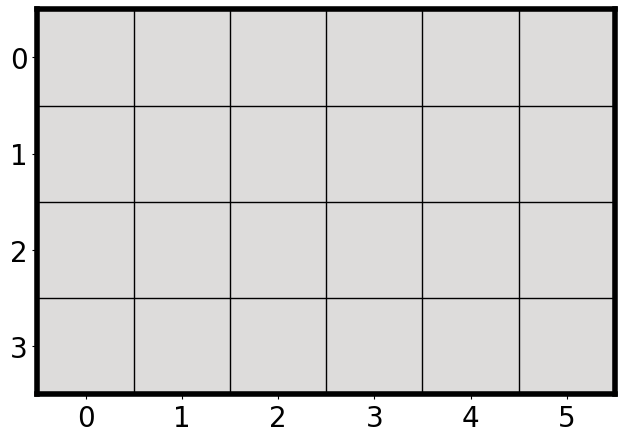

In [6]:
plt = plot_environment(environment, n_x, n_y, figsize=figsize, annotate=False)
plt.savefig('generalized-environment.svg', dpi=300, bbox_inches='tight', transparent=True)

In [7]:
location_positive_reward = (0,5)
location_negative_reward = (3,5)

In [8]:
def policy(state):

    state_y, state_x = state

    # Terminal state (+1) reward:
    if state == location_positive_reward:
        next_state = state

    # Terminal state (-1) reward:
    elif state == location_negative_reward:
        next_state = state 

    # Move right:
    elif state_x < n_x-1:
        next_state = (state_y, state_x + 1)

    # Move up:
    elif state_x == n_x-1:
        next_state = (state_y - 1, state_x)

    return next_state

In [9]:
def rewards(state):

    if state == location_positive_reward:
        reward = 1
    elif state == location_negative_reward:
        reward = -1
    else:
        reward = 0

    return reward

In [10]:
rewards_field = np.zeros_like(environment)

for i in range(0,n_y):
    for j in range(0,n_x):
        rewards_field[i,j] = rewards((i,j))

In [11]:
def map_state_to_flat_index(state, n_x):
    state_y, state_x = state
    return state_y * n_x + state_x

In [12]:
def map_flat_index_to_state(flat_index, n_x):
    state_y = int(flat_index/n_x)
    state_x = flat_index % n_x
    state = (state_y, state_x)
    return state

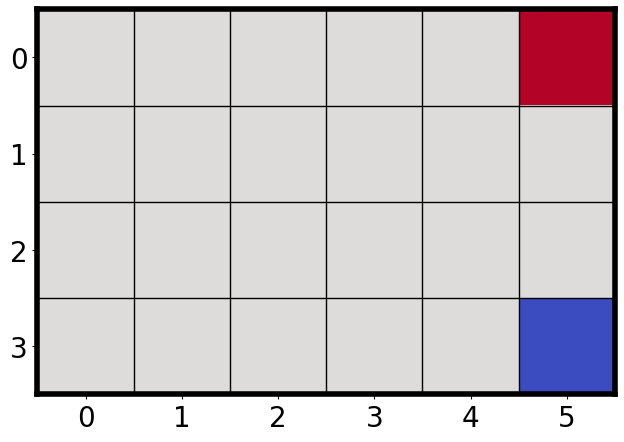

In [13]:
plt = plot_environment(rewards_field, n_x, n_y, figsize=figsize, annotate=False)
plt.savefig('generalized-environment-rewards.svg', dpi=300, bbox_inches='tight', transparent=True)

In [14]:
b = np.zeros(n_x*n_y)

for i in range(0,n_y):
    for j in range(0,n_x):
        flat_index = map_state_to_flat_index((i,j), n_x)
        b[flat_index] = rewards((i,j))

In [15]:
A = np.eye(n_x*n_y,n_x*n_y)

for z in range(0,n_x*n_y):

    current_state = map_flat_index_to_state(z, n_x)
    next_state = policy(current_state)
    idx = map_state_to_flat_index(next_state, n_x)

    # We're excluding terminal states:
    if next_state != current_state:
        A[z, idx] = A[z, idx] - discount

In [16]:
value_function = np.linalg.solve(A, b)
value_function = np.reshape(value_function, (n_y,n_x))

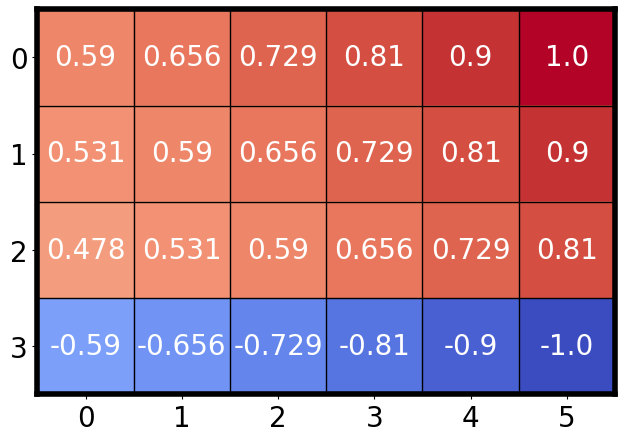

In [17]:
plt = plot_environment(value_function, n_x, n_y, figsize=figsize)
plt.savefig('generalized-RL-environement-with-value-function.svg', dpi=300, transparent=True, bbox_inches='tight')

***